# Lamine Diakite
# 10/23/2020

### import modules

In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style 
%matplotlib inline 

import seaborn as sns

### Load dataset

In [ ]:
shapes_df = pd.read_csv(r'C:/Users/Lamine Diakite/Desktop/Analyst_Coding_Test.csv')
shapes_df1 = shapes_df.copy()  # a copy of shapes_df to be used later to create pivot tables
shapes_df.head(2)

In [ ]:
os.getcwd()

In [ ]:
import os

os.listdir('.')

In [ ]:
path= 'C:/Users/Lamine Diakite/Desktop/Analyst_Coding_Test.csv'

with open(path,'r') as f:
    print(f.read())
    
print(f)

### Preprocessing 

In [1750]:
# Descriptive statistics
shapes_df.groupby(['shape','color']).describe()

area                                                         \
                 count          mean           std    min       25%       50%   
shape    color                                                                  
circle   blue      9.0   8740.600000   7690.067899  452.4  3217.000   7238.20   
         green    31.0  10489.977419   8192.054483  380.1  3681.950   9852.00   
         red      30.0  12871.420000  10671.755438   78.5  2507.775  12469.00   
         yellow   50.0   9888.412000   9226.523708   28.3  2165.325   6799.95   
square   blue    152.0   3857.993421   3073.266294    1.0   900.000   3080.50   
         green    47.0   2642.085106   2500.661155    1.0   401.000   1764.00   
         red      56.0   3154.017857   3083.168880    4.0   625.000   1849.00   
         yellow  222.0   3333.207207   2884.614921    1.0   841.000   2500.00   
triangle blue    199.0   2461.542714   2208.959730    0.8   432.000   1950.80   
         red     204.0   2665.857843   2123.497559    0.8   620.100   2227.90   

                                     
                       75%      max  
shape    color                       
circle   blue    13273.200  21642.4  
         green   16972.450  27759.1  
         red     22968.175  31415.9  
         yellow  17212.825  31415.9  
square   blue     6440.250   9801.0  
         green    4226.000   9025.0  
         red      5551.000   9801.0  
         yellow   5439.250   9801.0  
triangle blue     4107.000   7350.8  
         red      4332.000   7350.8

In [1751]:
# Total number of shape types and colors
print(shapes_df['shape'].value_counts())
print(shapes_df['color'].value_counts())

square      477
triangle    403
circle      120
Name: shape, dtype: int64
blue      360
red       290
yellow    272
green      78
Name: color, dtype: int64


## Question 1: Barplot of Area size distribution

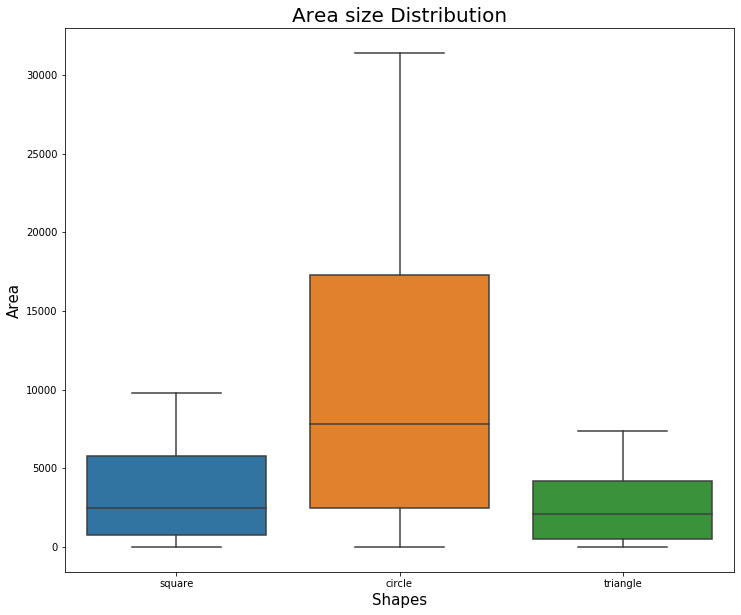

In [1752]:
fig, ax = plt.subplots(figsize = (12,10))
sns.boxplot(x = shapes_df['shape'], y = shapes_df['area'])
plt.title("Area size Distribution",fontsize=20)
plt.ylabel("Area",fontsize=15)
plt.xlabel("Shapes",fontsize=15)
#plt.setp(ax.get_xticklabels(), rotation=25)
plt.show()

## Question 2: Mean, Max, and Standard deviation of Area size of each color

In [1753]:
shapes_df.groupby('color').agg(["mean","max","std"]).round(2)

area                  
           mean      max      std
color                            
blue    3208.13  21642.4  3039.21
green   5761.12  27759.1  6695.03
red     3815.87  31415.9  5092.68
yellow  4538.21  31415.9  5352.46

## Question 3: Average Area Size of a Yellow Square is 3333

In [1754]:
shapes_df[(shapes_df['color']=="yellow") & (shapes_df['shape']=="square") ].mean()['area'].round(2)

3333.21

## Question 4: Shape most likely to be green is a Square

#### Create a pivot table using our copied version, shapes_df1, to help us answer the question

In [1755]:
# First add a count column to make building pivot table easier
shapes_df1['Count']= 1

In [1756]:
shapes_df1.head(1)

,shape,color,area,Count
0,square,yellow,9409.0,1


In [1757]:
pivot_table1 = shapes_df1.pivot_table(index=['color'],columns=['shape'],values=['Count'],aggfunc=np.sum,fill_value=0)
pivot_table1['Count']

shape,circle,square,triangle
color,,,
blue,9,152,199
green,31,47,0
red,30,56,204
yellow,50,222,0


##### Divide the count of green in each shape by the total number of green among all shapes to determine the probability.

In [1758]:
print("Percent of green circle among all shapes:", round(100*31/sum(pivot_table1.loc[pd.IndexSlice['green'],pd.IndexSlice[:]]),2),'%')

Percent of green circle among all shapes: 39.74 %


In [1759]:
print("Percent of green square among all shapes:", round(100*47/sum(pivot_table1.loc[pd.IndexSlice['green'],pd.IndexSlice[:]]),2),'%')

Percent of green square among all shapes: 60.26 %


In [1760]:
print("Percent of green triangle among all shapes:", round(100*0/sum(pivot_table1.loc[pd.IndexSlice['green'],pd.IndexSlice[:]].round(2)),2),'%')

Percent of green triangle among all shapes: 0.0 %


## Question 5: Given a Red color with an Area > 3000, chances of the red object being square, triangle, circle

#### First create a subset of the shapes_df where color is red and area size > 3000

In [1761]:
reds_with_area_above_3000 = shapes_df1[(shapes_df1['color']=='red') & (shapes_df1['area']> 3000)]
reds_with_area_above_3000.head()

,shape,color,area,Count
7,triangle,red,4563.0,1
9,triangle,red,5043.0,1
24,triangle,red,3996.8,1
30,triangle,red,4446.8,1
38,square,red,5929.0,1


#### Then create a pivot table to capture the red counts of each shape

In [1762]:
pivot_table2= reds_with_area_above_3000.pivot_table(index=['color'],columns=['shape'],values=['Count'],aggfunc=np.sum,fill_value=0)
pivot_table2

Count                
shape circle square triangle
color                       
red       20     21       84

##### Divide the total red shape with area > 3000 by the total count of the respective shape in the dataset to determine the probability.

In [1763]:
print("The chances of the red object being a circle is:", round(100*20/shapes_df[shapes_df['shape']=='circle'].count()['shape'],3),'%')

The chances of the red object being a circle is: 16.667 %


In [1764]:
print("The chances of the red object being a square is:",round(100*21/shapes_df[shapes_df['shape']=='square'].count()['shape'],3),'%')

The chances of the red object being a square is: 4.403 %


In [1765]:
print("The chances of the red object being a triangle is:",round(100*84/shapes_df[shapes_df['shape']=='triangle'].count()['shape'],3),'%')

The chances of the red object being a triangle is: 20.844 %


## Question 6: Function to calculate the side or radius of an object, depending on the shape and area of the object

In [1766]:
# Important formula to note. We are also considering our triangle to be an Equilateral triangle
print("Circle: A= Pi*r^2. So the radius= sqrt(A/Pi)")
print("Square: A= Side*2. So the Side= sqrt(A)")
print("Equilateral Triangle: A= (Side ^ 2) * sqrt(3) / 4. So the Side= sqrt(4*A/sqrt(3))")

Circle: A= Pi*r^2. So the radius= sqrt(A/Pi)
Square: A= Side*2. So the Side= sqrt(A)
Equilateral Triangle: A= (Side ^ 2) * sqrt(3) / 4. So the Side= sqrt(4*A/sqrt(3))


In [1767]:
def side_or_radius(shape,area):
    if shape=="circle":
        return np.sqrt(area/np.pi).round(2)
    elif shape=="square":
        return np.sqrt(area).round(2)
    elif shape=="triangle":
        return np.sqrt(4*area/np.sqrt(3)).round(2)
    else:
        print("Choose from the three shape choices")

In [1768]:
# Testing
print("The radius of a circle with an Area of 16 is:", side_or_radius("circle",16))
print("The side of a square with an Area of 16 is:", side_or_radius("square",16))
print("The side of a triangle with an Area of 16 is:", side_or_radius("triangle",16))

The radius of a circle with an Area of 16 is: 2.26
The side of a square with an Area of 16 is: 4.0
The side of a triangle with an Area of 16 is: 6.08


## Question 7: New column called Side, containing the Side or Radius of the respective Shape.

In [1769]:
shapes_df['side'] = shapes_df.apply(lambda x: side_or_radius(x['shape'], x['area']).round(0), axis=1)

In [1770]:
shapes_df.head(2)

,shape,color,area,side
0,square,yellow,9409.0,97.0
1,circle,yellow,4071.5,36.0


## Question 8: Boxplot showing the Side/Radius size distribution for each shape

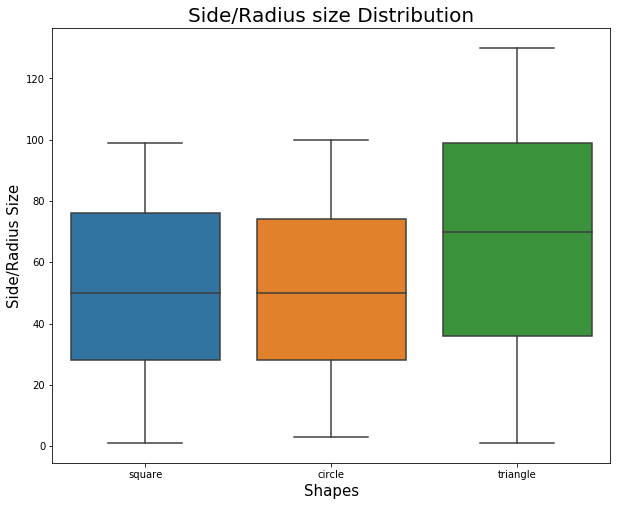

In [1771]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(x = shapes_df['shape'], y = shapes_df['side'])
plt.title("Side/Radius size Distribution",fontsize=20)
plt.ylabel("Side/Radius Size",fontsize=15)
plt.xlabel("Shapes", fontsize=15)
#plt.setp(ax.get_xticklabels(), rotation=25)
plt.show()

#### We can infer that our data doesn't contain any outliers.
#### We can also infer that the distribution of the side/radius of the shapes are approximately symmetric because the median is roughly in the middle.  

## Question 9: Scatterplot of Side vs Area

#### A pivot table to capture the red counts of each shape

In [1772]:
shapes_df1['side'] = shapes_df.apply(lambda x: side_or_radius(x['shape'], x['area']).round(0), axis=1)
shapes_df1['index']=np.arange(len(shapes_df1))  # to make it easier to create a pivot table

In [1773]:
pivot_table3= shapes_df1.pivot_table(index=['index'],columns=['shape'],values=['side','area'],aggfunc='sum',fill_value=0)
pivot_table3.head()

area                   side                
shape  circle square triangle circle square triangle
index                                               
0         0.0   9409      0.0      0     97        0
1      4071.5      0      0.0     36      0        0
2         0.0      0   2028.0      0      0       68
3         0.0   3025      0.0      0     55        0
4         0.0   9216      0.0      0     96        0

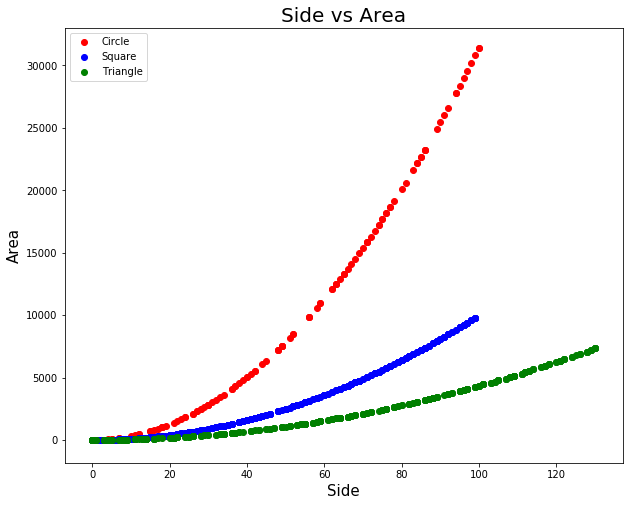

In [1774]:
fig, ax= plt.subplots(figsize=(10,8))

plt.scatter(pivot_table3['side']['circle'], pivot_table3['area']['circle'],color='red',label='Circle',alpha=1)
plt.scatter(pivot_table3['side']['square'], pivot_table3['area']['square'],color='blue',label='Square',alpha=1)
plt.scatter(pivot_table3['side']['triangle'], pivot_table3['area']['triangle'],color='green',label='Triangle',alpha=1)
plt.legend(loc='upper left')
plt.xlabel("Side",fontsize = 15)
plt.ylabel("Area",fontsize = 15)
plt.title("Side vs Area", fontsize = 20)
plt.show()

## Question 10:

### a) Proportion of red objects within each shape

In [1775]:
pivot_table4= shapes_df1.pivot_table(index=['color'],columns=['shape'],values=['Count'],aggfunc=np.sum,fill_value=0)

#### Transform the pivot table into a normal dataframe

In [1776]:
pivot_table4.columns = pivot_table4.columns.droplevel(0)
pivot_table4 = pivot_table4.reset_index().rename_axis(None, axis=1)
pivot_table4

,color,circle,square,triangle
0,blue,9,152,199
1,green,31,47,0
2,red,30,56,204
3,yellow,50,222,0


#### Dataframe of proportion of red object within each shape

In [1777]:
d={}
for i in pivot_table4.iloc[:,1:]:
    d.update({i:(pivot_table4[i][pivot_table4.iloc[2:3,0:1].index]/ sum(pivot_table4[i])).round(2)})
df= pd.DataFrame(d)
df.index = ['red']
print(df)   

     circle  square  triangle
red    0.25    0.12      0.51


### b) Proportion of blue area over shape's total area 

#### Create another pivot table

In [1778]:
pivot_table5 = shapes_df1.pivot_table(index=['color'],columns=['shape'],values=['area'],aggfunc='sum',fill_value=0)

In [1779]:
pivot_table5.columns = pivot_table5.columns.droplevel(0)
pivot_table5 = pivot_table5.reset_index().rename_axis(None, axis=1)
pivot_table5

,color,circle,square,triangle
0,blue,78665.4,586415,489847
1,green,325189.3,124178,0
2,red,386142.6,176625,543835
3,yellow,494420.6,739972,0


#### Dataframe of proportion of blue area over each shapes' total area

In [1780]:
d={}
for i in pivot_table5.iloc[:,1:]:
    for j in pivot_table5['color']:
        d.update({i:(pivot_table5[i][pivot_table5['color'].index]/ sum(pivot_table5[i])).round(2)})
df= pd.DataFrame(d)
df.index = ['blue','green','red','yellow']
print(df.iloc[0:1,:])   

      circle  square  triangle
blue    0.06    0.36      0.47


### Question 11: Function to calculate 10.b for given shape and color

In [1781]:
# Set color as the index
pivot_table5.set_index('color',inplace=True)

In [1782]:
# Area proportion function
def areaproportionof(color,shape):
    dic={}
    dic[shape]= (pivot_table5[shape][color]/ sum(pivot_table5[shape])).round(2)
    print(pd.DataFrame(dic,index=[color]))

In [1783]:
# Testing 
print(areaproportionof('blue','circle'))
print(areaproportionof('blue','square'))
print(areaproportionof('blue','triangle'))
print(areaproportionof('red','triangle'))

      circle
blue    0.06
None
      square
blue    0.36
None
      triangle
blue      0.47
None
     triangle
red      0.53
None
